In [1]:
%matplotlib widget
"""
This cell import useful functions from libraries as well as custom ones found in Hugoniot_seeker_functions.py
"""

# Import useful functions
import numpy as np
import matplotlib.pyplot as plt

from Hugoniot_seeker_functions import (
    init_Hugoniot_functions,
    Fused_Hugoniot_us_up_0,
    sesame_hugoniot,
    hug_plus_release_reshock,
    resume,
    plot_velocity,
    update_file_hugoniot
)

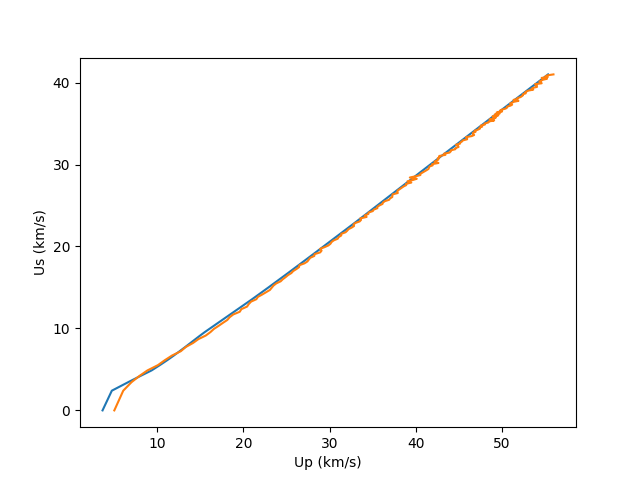

In [2]:
"""
This cell defines the Us(Up) relation of the reference material. Here, it is for the fused silica. It is customized to take into account experimental errors from the measured relation.
It loads the reference material Hugoniot curve
It also loads the release/reshock curves for the given material from SESAME (here fused silica)
"""

# Create function Up = f(Us) by interpolating existing data with error bar
Up_from_Us, Up_from_Us_err = init_Hugoniot_functions("Fused_Hugoniot_us_up_0", (5, 60), True)

r, P, T, Us, Up = sesame_hugoniot(7361, initP=1e-4, endP=50, points=200)
Us_model = Fused_Hugoniot_us_up_0(Up)

# Loading release/reshock curves of know material
secondhug7361 = hug_plus_release_reshock(7361)


plt.plot(Us, Up)
plt.plot(Us_model, Up)
plt.xlabel("Up (km/s)")
plt.ylabel("Us (km/s)")
plt.show()

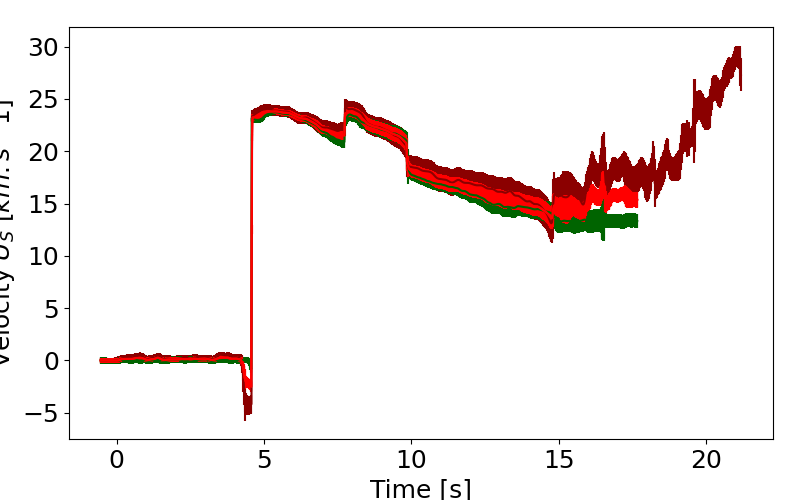

In [3]:
"""
When analyzing several shot of the same material, you can restart all the cells from this one.
This cell is to measure what is the shock velocity in the reference material just before the transition, and just after the transition in the studied material. Note both value and rewrite them in the following cell.

In red the velocity mean of both VISARs
In dark red VISAR1
In green VISAR2
"""

tir_number = 74
plt.rcParams.update({"font.size": 18})

plot_velocity(file_neutrino=f"VISAR_vel/Tir{tir_number:02d}.txt")

# file_neutrino=f"../Exploitation Mai 2025/VISAR_vel/Tir{tir_number:02d}.txt"
# file_neutrino=f"VISAR_Vel/Tir{tir_number:02d}.txt"

us0= 21.600 up0= 13.710 p0= 652.706 i  46 [ 643.250   653.300]   0.059
keeping 98.3% of data
us0  =  21.600 +- 0.740  
us1  =  23.600 +- 0.500  
up2  =  16.970 +- 0.823  
p2   = 383.463 +- 19.724 
rho2 =   3.471 +- 0.491  


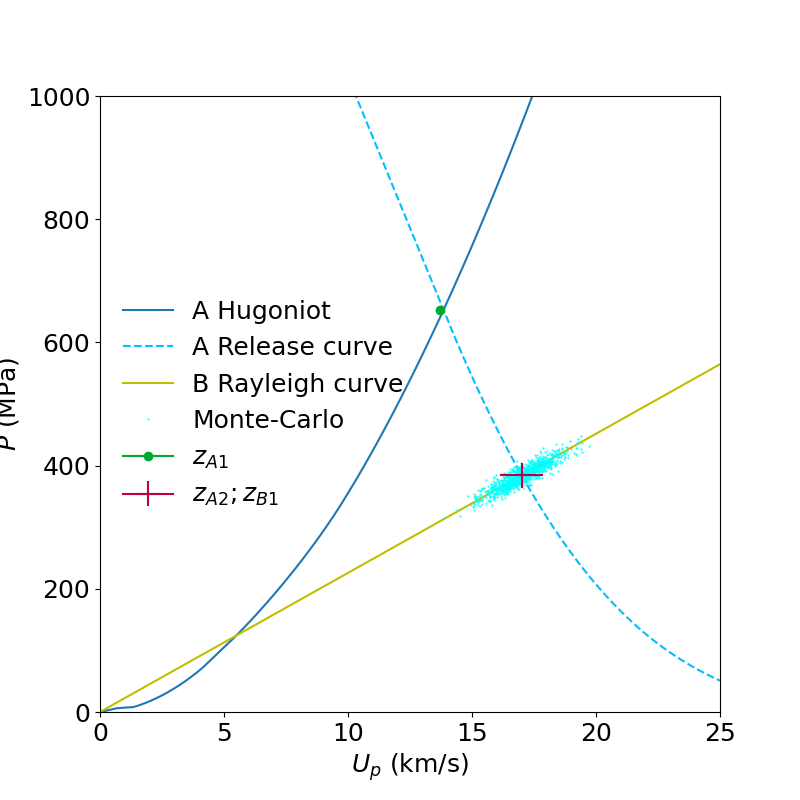

In [6]:
"""
This cell put in place the impedance mismatch method.

What needs to be changed:
us0: Shock velocity in the reference material
us1: Shock velocity in the studied material

us0_err: Shock velocity error in the reference material
us1_err: Shock velocity error in the studied material

Also, check density of reference rho0 and studied material rho1

On the graph, check visually that the impedance mismatch is coherent

The determined point equation of state is printed at the end of the cell. Also, results are saved in a file with the update_file_hugoniot function.

It will register the following information:
#Shot	Us	Up	P	rho	Us_err	Up_err	P_err	rho_err
"""

# Function Up = f(Us) + error bar
Up_from_Us, Up_from_Us_err = init_Hugoniot_functions("Fused_Hugoniot_us_up_0", (5, 60), True)

# Load release/reshock curves of material (7361 = Fused silica)
secondhug7361 = hug_plus_release_reshock(7361)

us0 = 21.60  # Us in reference material
us1 = 23.60  # Us in studied material

us0_err = 0.74
us1_err = 0.5

rho0 = 2.204
rho1 = 0.957

fig1 = plt.figure(figsize=(8, 8))
plt.rcParams.update({"font.size": 18})

# print(Up)
r, P, T, Us, Up = sesame_hugoniot(7361, initP=5e-4, endP=20, points=1000)
plt.plot(Up, P, label="A Hugoniot")  # label="7361"
# plt.plot(Up, rho0 * Up * Fused_Hugoniot_us_up_0(Up))

plt.ylim(0, 1000)
plt.xlim(0, 25)
plt.xlabel("$U_p$ (km/s)")
plt.ylabel("$P$ (MPa)")
# plt.grid()


# plt.plot(Up, rho0 * Up * us0)

res, res_err = resume(
    secondary_hugoniot=secondhug7361,
    Up_from_Us=Up_from_Us,
    Up_from_Us_err=Up_from_Us_err,
    us0=us0,
    us1=us1,
    rho0=rho0,
    rho1=rho1,
    us0_err=us0_err,
    us1_err=us1_err,
    doPlot=True,
)

# Part to save the results in the file.
file_path = "NH3H2O_10_hugoniot.txt"

update_file_hugoniot(
    file_path,
    tir_number,
    us0,
    us1,
    res_err["up2"][0],
    res_err["p2"][0],
    res_err["rho2"][0],
    us_standard_err=us0_err,
    us_studied_err=us1_err,
    up_err=res_err["up2"][1],
    p_err=res_err["p2"][1],
    rho_err=res_err["rho2"][1],
)